# Analysis of post-translational modificiations

In this notebook we analyse a phospho dataset from the publication Fricke et al. 2022 (https://pubs.acs.org/doi/full/10.1021/acs.jproteome.2c00505) available through the PRIDE repository ID PXD018667.
As the uploaded dataset in PRIDE is several gigabytes large, we supply a zipped version of the proteinGroups.txt, the onyl file we need in this example. If you are interested in starting from the original dataset, feel free to uncomment the download lines for PRIDE.


In [1]:
import sys, os

import matplotlib.pyplot as plt

sys.path.append('../..')
from autoprot import preprocessing as pp
from autoprot import analysis as ana
from autoprot import visualization as vis

C:\Users\jub29yk\Anaconda3\envs\autoprot\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
import zipfile

# UNCOMMENT HERE TO GET FILES FROM PRIDE
# # Get a dict mapping the files matching the keyword (2nd arg) to their ftp download link
# ftp_links = pp.fetch_from_pride("PXD018667", "combined")
# # download the MaxQuant results if they are not present in the folder
# if not os.path.isfile("./combined.zip"):
#     pp.download_from_ftp(ftp_links['combined.zip'], save_dir = '.')
# archive = zipfile.ZipFile("./combined.zip", 'r')
# txt = archive.open('combined/txt/proteinGroups.txt')

# COMMENT HERE IF YOU USE PRIDE DOWNLOAD
archive = zipfile.ZipFile("./03_Phospho (STY)Sites.zip", 'r')
txt = archive.open('Phospho (STY)Sites.txt')
phos = pp.read_csv(txt)

## Preprocessing

In [3]:
phos = pp.cleaning(phos, file="Phospho (STY)")
phos.head()

34329 rows before filter operation.
33964 rows after filter operation.


,Proteins,Positions within proteins,Leading proteins,Protein,Protein names,Gene names,Fasta headers,Localization prob,Score diff,PEP,...,Best localization raw file,Best localization scan number,Best score evidence ID,Best score MS/MS ID,Best score raw file,Best score scan number,Best PEP evidence ID,Best PEP MS/MS ID,Best PEP raw file,Best PEP scan number
0,A0A023T672;Q9CWZ3-2;Q9CWZ3,24;24;24,A0A023T672,A0A023T672,RNA-binding protein 8A,RBM8;Rbm8a,>tr|A0A023T672|A0A023T672_MOUSE RNA-binding pr...,1.000000,42.2678,1.991340e-131,...,QEplus005579,19620,40732,83687,QEplus005451,23537,40732,83687,QEplus005451,23537
1,A0A023T672,42,A0A023T672,A0A023T672,NaN,RBM8,>tr|A0A023T672|A0A023T672_MOUSE RNA-binding pr...,0.999998,57.8183,1.021580e-05,...,ELITE-RSLC009876,4589,714194,1464632,ELITE-RSLC009876,4589,714197,1464642,QEplus005102,8390
2,A0A023T672;Q9CWZ3-2;Q9CWZ3,56;55;56,A0A023T672,A0A023T672,RNA-binding protein 8A,RBM8;Rbm8a,>tr|A0A023T672|A0A023T672_MOUSE RNA-binding pr...,1.000000,96.7686,2.500020e-57,...,ELITE-RSLC009871,7851,1607749,3276072,ELITE-RSLC009871,7851,1607775,3276135,QEplus005567,11987
3,A2ADP2;A0A067XG46;Q3UWJ5;Q8CDM3;Q9R0X5-2;Q9R0X...,434;434;434;434;396;396;339;434;396;396,A2ADP2,A2ADP2,X-linked retinitis pigmentosa GTPase regulator,Rpgr,>tr|A2ADP2|A2ADP2_MOUSE X-linked retinitis pig...,0.999782,41.1283,2.789750e-12,...,ELITE-RSLC009943,17681,1338888,2742160,ELITE-RSLC009835,17821,1338894,2742168,QEplus005346,29206
4,A2ADP2;A0A067XG46;Q3UWJ5;Q8CDM3;Q9R0X5-2;Q9R0X...,657;950;657;950;619;912;562,A2ADP2,A2ADP2,X-linked retinitis pigmentosa GTPase regulator,Rpgr,>tr|A2ADP2|A2ADP2_MOUSE X-linked retinitis pig...,0.249998,0.0000,1.964850e-03,...,ELITE-RSLC009998,6760,2522605,5169227,ELITE-RSLC009998,6760,2522605,5169227,ELITE-RSLC009998,6760


In [4]:
phos_ratio = phos.filter(regex="Ratio ./. normalized R.TS.___").columns
phos, log_phos_ratio = pp.log(phos, phos_ratio, base=2, return_cols=True)
phos[log_phos_ratio]

,log2_Ratio M/L normalized R1TS1___1,log2_Ratio M/L normalized R1TS1___2,log2_Ratio M/L normalized R1TS1___3,log2_Ratio H/L normalized R1TS1___1,log2_Ratio H/L normalized R1TS1___2,log2_Ratio H/L normalized R1TS1___3,log2_Ratio H/M normalized R1TS1___1,log2_Ratio H/M normalized R1TS1___2,log2_Ratio H/M normalized R1TS1___3,log2_Ratio M/L normalized R1TS2___1,...,log2_Ratio H/M normalized R4TS1___3,log2_Ratio M/L normalized R4TS2___1,log2_Ratio M/L normalized R4TS2___2,log2_Ratio M/L normalized R4TS2___3,log2_Ratio H/L normalized R4TS2___1,log2_Ratio H/L normalized R4TS2___2,log2_Ratio H/L normalized R4TS2___3,log2_Ratio H/M normalized R4TS2___1,log2_Ratio H/M normalized R4TS2___2,log2_Ratio H/M normalized R4TS2___3
0,0.126312,NaN,NaN,0.120617,NaN,NaN,-0.139426,NaN,NaN,0.368824,...,NaN,0.005184,NaN,NaN,0.104873,NaN,NaN,0.066950,NaN,NaN
1,0.077653,NaN,NaN,-0.018293,NaN,NaN,-0.098629,NaN,NaN,-0.077878,...,NaN,-0.155534,NaN,NaN,-0.010963,NaN,NaN,0.150950,NaN,NaN
2,0.098015,NaN,NaN,-0.214809,NaN,NaN,0.170181,NaN,NaN,-0.019448,...,NaN,-0.183605,NaN,NaN,-0.081812,NaN,NaN,0.061154,NaN,NaN
3,0.259423,NaN,NaN,0.151209,NaN,NaN,-0.065265,NaN,NaN,0.075190,...,NaN,-0.340678,NaN,NaN,0.302524,NaN,NaN,0.663117,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.244788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filtering by localisation probability
MaxQuant assigns a localisation probability to every identified phosphosite depending on the fragment ions observed during MSMS. Here we filter by this probability keeping only sites that have a rather confident assignment.

In [5]:
phos = pp.filter_loc_prob(phos, thresh=.75)

33964 rows before filter operation.
21611 rows after filter operation.


In [6]:
phos = pp.remove_non_quant(phos, log_phos_ratio)
phos[log_phos_ratio]

21611 rows before filter operation.
21233 rows after filter operation.


,log2_Ratio M/L normalized R1TS1___1,log2_Ratio M/L normalized R1TS1___2,log2_Ratio M/L normalized R1TS1___3,log2_Ratio H/L normalized R1TS1___1,log2_Ratio H/L normalized R1TS1___2,log2_Ratio H/L normalized R1TS1___3,log2_Ratio H/M normalized R1TS1___1,log2_Ratio H/M normalized R1TS1___2,log2_Ratio H/M normalized R1TS1___3,log2_Ratio M/L normalized R1TS2___1,...,log2_Ratio H/M normalized R4TS1___3,log2_Ratio M/L normalized R4TS2___1,log2_Ratio M/L normalized R4TS2___2,log2_Ratio M/L normalized R4TS2___3,log2_Ratio H/L normalized R4TS2___1,log2_Ratio H/L normalized R4TS2___2,log2_Ratio H/L normalized R4TS2___3,log2_Ratio H/M normalized R4TS2___1,log2_Ratio H/M normalized R4TS2___2,log2_Ratio H/M normalized R4TS2___3
0,0.126312,NaN,NaN,0.120617,NaN,NaN,-0.139426,NaN,NaN,0.368824,...,NaN,0.005184,NaN,NaN,0.104873,NaN,NaN,0.066950,NaN,NaN
1,0.077653,NaN,NaN,-0.018293,NaN,NaN,-0.098629,NaN,NaN,-0.077878,...,NaN,-0.155534,NaN,NaN,-0.010963,NaN,NaN,0.150950,NaN,NaN
2,0.098015,NaN,NaN,-0.214809,NaN,NaN,0.170181,NaN,NaN,-0.019448,...,NaN,-0.183605,NaN,NaN,-0.081812,NaN,NaN,0.061154,NaN,NaN
3,0.259423,NaN,NaN,0.151209,NaN,NaN,-0.065265,NaN,NaN,0.075190,...,NaN,-0.340678,NaN,NaN,0.302524,NaN,NaN,0.663117,NaN,NaN
10,NaN,0.591967,NaN,NaN,0.023184,NaN,NaN,-0.603029,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-8.807059,NaN,NaN,-7.646542,NaN,NaN,1.126312,NaN
34314,0.135666,NaN,NaN,0.117562,NaN,NaN,0.031819,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.244788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Expanding the Phospho(STY) table
The table returned by MaxQuant lists single phosphosite per row, however, the site may have different multiplicities, i.e. it might occur as part of single-phosphorylated peptides (then it is the only phosphorylation) or as part of multi-phosphorylated peptides. Autoprot contains a function to transform the phosphosite table into a phosphopeptide table, listing the different multiplicities as distinct rows.

In [7]:
phos_expanded = pp.expand_site_table(phos, log_phos_ratio)
# Note that these are the Ratios without Multiplicity
log_phos_ratio_no_multi = phos_expanded.filter(regex="log2_Ratio ./. normalized R.TS.").columns.to_list()
phos_expanded[['Multiplicity',] + log_phos_ratio_no_multi]

21233 phosphosites in dataframe.


C:\Users\jub29yk\Documents\Python Scripts\autoprot\examples\../..\autoprot\preprocessing.py:398: UserWarning: The dataframe contains 0 values that will not be filtered out eventually. Will replace by np.nan. If this is not intended set replace_zero to False.
  warnings.warn(


28940 phospho peptides in dataframe after expansion.


,Multiplicity,log2_Ratio M/L normalized R1TS1,log2_Ratio H/L normalized R1TS1,log2_Ratio H/M normalized R1TS1,log2_Ratio M/L normalized R1TS2,log2_Ratio H/L normalized R1TS2,log2_Ratio H/M normalized R1TS2,log2_Ratio M/L normalized R2TS1,log2_Ratio H/L normalized R2TS1,log2_Ratio H/M normalized R2TS1,...,log2_Ratio H/M normalized R3TS1,log2_Ratio M/L normalized R3TS2,log2_Ratio H/L normalized R3TS2,log2_Ratio H/M normalized R3TS2,log2_Ratio M/L normalized R4TS1,log2_Ratio H/L normalized R4TS1,log2_Ratio H/M normalized R4TS1,log2_Ratio M/L normalized R4TS2,log2_Ratio H/L normalized R4TS2,log2_Ratio H/M normalized R4TS2
0,1,0.126312,0.120617,-0.139426,0.368824,0.044744,-0.142481,0.140648,0.109962,-0.082347,...,-0.288946,0.297720,0.053806,-0.194311,0.103531,-0.081766,-0.049472,0.005184,0.104873,0.066950
3,1,0.077653,-0.018293,-0.098629,-0.077878,-0.162444,-0.060743,-0.200366,-0.051130,0.210139,...,-0.068710,0.016068,-0.002498,0.045303,-0.291274,0.059632,0.387583,-0.155534,-0.010963,0.150950
6,1,0.098015,-0.214809,0.170181,-0.019448,0.134484,-0.007014,-0.104139,-0.250080,-0.060548,...,-0.009118,0.008774,0.019631,0.051720,-0.236435,0.014498,0.098420,-0.183605,-0.081812,0.061154
9,1,0.259423,0.151209,-0.065265,0.075190,0.229957,0.075601,-0.087519,0.235605,0.073820,...,-0.271409,-0.180005,-0.236894,0.124857,-0.339053,0.094236,0.457962,-0.340678,0.302524,0.663117
12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.379658,0.219339,0.420833,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63685,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.807059,-7.646542,1.126312
63687,1,0.135666,0.117562,0.031819,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63690,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63693,1,NaN,NaN,NaN,-0.244788,-0.111991,0.088820,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing value analysis
Datasets can contain missing values for two reasons: The peptides were not identified because they were too low abundant (missing not at random) or because the instrument was busy selection other more abundant peptides for fragmentation (missing at random). Both require different treatment. In Autoprot the imp_min_prob algorithm allows imputating low, random values for missing numbers for example to allow ratio calculation for missing not at random peptides. A more sophisticated approach is DIMA included in autoprot that selects a suitable imputation algorithm for values missing at random.

In the next cell, we first want to have a look at how missing values are distributed accros the phosphopeptide table:

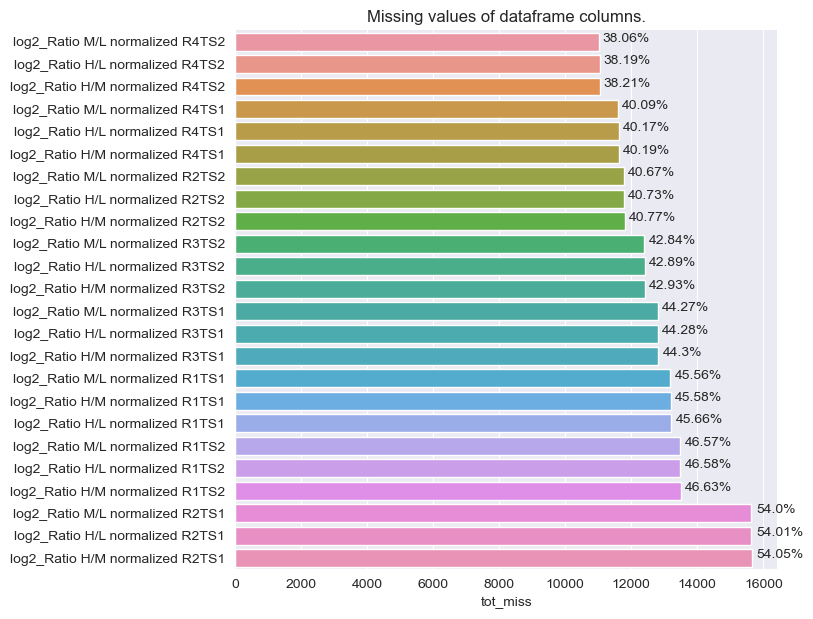

In [8]:
ana.miss_analysis(phos_expanded, log_phos_ratio_no_multi, extra_vis=False, text=False)

### LIMMA
In order to perform a kinase substrate enrichment analysis we need fold-changes associates with every treatment (i.e. the inhibitors MK, U0, LY and T1). However, they are encoded by L, M, H labels in the different rawfiles. Moreover, to simplify cell handling a fixed set of inhibitors was tested for every multi-well plate (e.g. DMSO Mk and Ly were alway TS1). This has no effect on the experiment but should be taken into account nevertheless. We will use a linear model to disentangle the effect of labeling and the different inhibitors resulting in a fold-change for every inhibitor and the L and H labels (the M label is automatically included by the absence of L and H labels). With the fold-changes returned by the linear model, we will calculate the effects of the different inhibitors on the phosphorylation of kinase substrates.

In [9]:
# These are the colnames for the normalized ratios similar to log_phos_ratio_no_multi but in a defined order matchin the design.txt
designCol = [
  'log2_Ratio M/L normalized R1TS1', 'log2_Ratio H/L normalized R1TS1', 'log2_Ratio H/M normalized R1TS1',
  'log2_Ratio M/L normalized R1TS2', 'log2_Ratio H/L normalized R1TS2', 'log2_Ratio H/M normalized R1TS2',
  'log2_Ratio M/L normalized R2TS1', 'log2_Ratio H/L normalized R2TS1', 'log2_Ratio H/M normalized R2TS1',
  'log2_Ratio M/L normalized R2TS2', 'log2_Ratio H/L normalized R2TS2', 'log2_Ratio H/M normalized R2TS2',
  'log2_Ratio M/L normalized R3TS1', 'log2_Ratio H/L normalized R3TS1', 'log2_Ratio H/M normalized R3TS1',
  'log2_Ratio M/L normalized R3TS2', 'log2_Ratio H/L normalized R3TS2', 'log2_Ratio H/M normalized R3TS2',
  'log2_Ratio M/L normalized R4TS1', 'log2_Ratio H/L normalized R4TS1', 'log2_Ratio H/M normalized R4TS1',
  'log2_Ratio M/L normalized R4TS2', 'log2_Ratio H/L normalized R4TS2', 'log2_Ratio H/M normalized R4TS2' ]

# The design matrix maps the different conditions to the columns
# For example, a medium channel corresponding to the Mk inhibitor and the plate TS2 would be labelled H=0 and L=-1, Mk=0, U0=0, LY=0 and T1=0
design = pp.read_csv("design.txt")
design.index = designCol
design

,H,L,MK,U0,LY,T1
log2_Ratio M/L normalized R1TS1,0,-1,1,0,0,0
log2_Ratio H/L normalized R1TS1,1,-1,0,1,0,0
log2_Ratio H/M normalized R1TS1,1,0,-1,1,0,0
log2_Ratio M/L normalized R1TS2,0,-1,0,0,1,0
log2_Ratio H/L normalized R1TS2,1,-1,0,0,0,1
log2_Ratio H/M normalized R1TS2,1,0,0,0,-1,1
log2_Ratio M/L normalized R2TS1,0,-1,1,0,0,0
log2_Ratio H/L normalized R2TS1,1,-1,0,1,0,0
log2_Ratio H/M normalized R2TS1,1,0,-1,1,0,0
log2_Ratio M/L normalized R2TS2,0,-1,0,0,1,0


For the actual limma, we supply the coefficient for extraction along with a suffix that will be used to add a new column to the dataframe. This allows to reuse the same dataframe multiple times, each time collecting a new set of columns for the next inhibitor. Note that the values in coef correspond to the column names in the design matrix. You could also specify more advanced extractions such as "MK-U0" to get the contrast between the two inhibitors.

In [10]:
for suffix, coef in zip(['_mk', '_u0', '_ly', '_t1'], ['MK', 'U0', 'LY', 'T1']):
    phos_expanded = ana.limma(phos_expanded, designCol, cond=suffix, custom_design='design.txt', coef=coef, print_r=False)

LIMMA: Assuming a custom design test with:
Design specified at design.txt
Columns: log2_Ratio M/L normalized R1TS1
	log2_Ratio H/L normalized R1TS1
	log2_Ratio H/M normalized R1TS1
	log2_Ratio M/L normalized R1TS2
	log2_Ratio H/L normalized R1TS2
	log2_Ratio H/M normalized R1TS2
	log2_Ratio M/L normalized R2TS1
	log2_Ratio H/L normalized R2TS1
	log2_Ratio H/M normalized R2TS1
	log2_Ratio M/L normalized R2TS2
	log2_Ratio H/L normalized R2TS2
	log2_Ratio H/M normalized R2TS2
	log2_Ratio M/L normalized R3TS1
	log2_Ratio H/L normalized R3TS1
	log2_Ratio H/M normalized R3TS1
	log2_Ratio M/L normalized R3TS2
	log2_Ratio H/L normalized R3TS2
	log2_Ratio H/M normalized R3TS2
	log2_Ratio M/L normalized R4TS1
	log2_Ratio H/L normalized R4TS1
	log2_Ratio H/M normalized R4TS1
	log2_Ratio M/L normalized R4TS2
	log2_Ratio H/L normalized R4TS2
	log2_Ratio H/M normalized R4TS2
Using design matrix:

|    |   H |   L |   MK |   U0 |   LY |   T1 |
|---:|----:|----:|-----:|-----:|-----:|-----:|
|  0 |   0

After LIMMA, it is usually a good idea to check the resulting p-values to see how the significances are distributed. Here we see that for LY and Torin-1 there is a distinct sub-population with very low p values which are the most interesting targets.

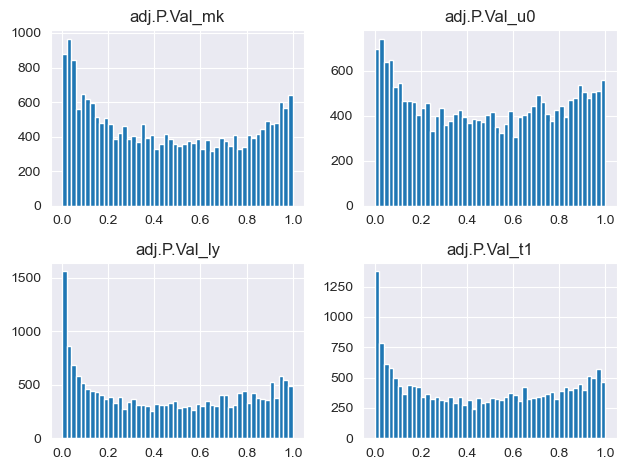

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)
for ax, pval in zip(axs.flatten(), ["adj.P.Val_mk", "adj.P.Val_u0", "adj.P.Val_ly", "adj.P.Val_t1"]):
    phos_expanded[pval].hist(bins=50, ax=ax)
    ax.set_title(pval)
plt.tight_layout()

## Functional annotation
Autoprot comes with a few tools dedicated to the analysis of phosho data sets. For example, the motif annot function quickly generates a new column specifying the number of matches a certain motif hast within the peptide sequence. Using Pandas' value_counts, we can see that almost 2000 phosphopeptides contain the PxS/TP motif.

In [12]:
motif = "PxS/TP"
pp.motif_annot(phos_expanded, motif)['PxS/TP'].value_counts()

0    26942
1     1998
Name: PxS/TP, dtype: int64

Another kex tools in autoprot for phospho analysis is kinase-substrate enrichment analysis (KSEA). The tool compares the relative abundances of peptide sequences matching a certain kinase and calculates a corresponding score showing the increase of kinase targets during a certain treatment. This quickly enables to check on the effect of for example kinase inhibitors.

KSEA is implemented as a class (what makes sense as the very same data can be kept and only the analysis is repeated). Therefore, we first need to initialise a KSEA object and set a certain kinase database (currently mouse and human are implemented). The get_kinase_overview function then return a quick first impression which kinase targets are present in the dataset.

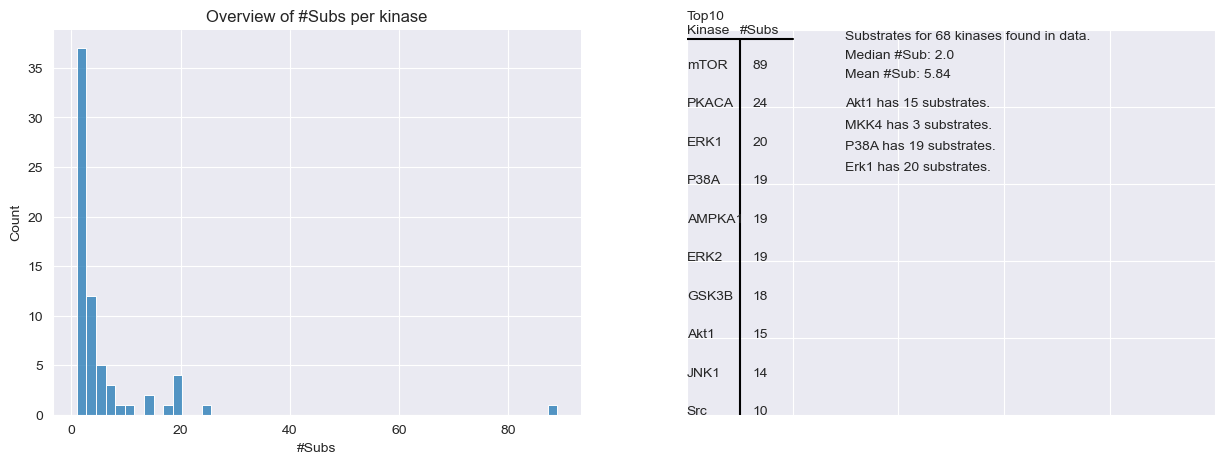

In [13]:
ksea = ana.KSEA(phos_expanded)
ksea.annotate(organism="mouse", only_in_vivo=True)
ksea.get_kinase_overview(kois=["Akt1","MKK4", "P38A", "Erk1"])

Using the log fold-change values extracted in limma, we can also directly map the effects of the different Inhibitors on the kinase targets. Note that, as limma is a global analysis, these fold-changes already account for effects by labelling and the two-plate layout.

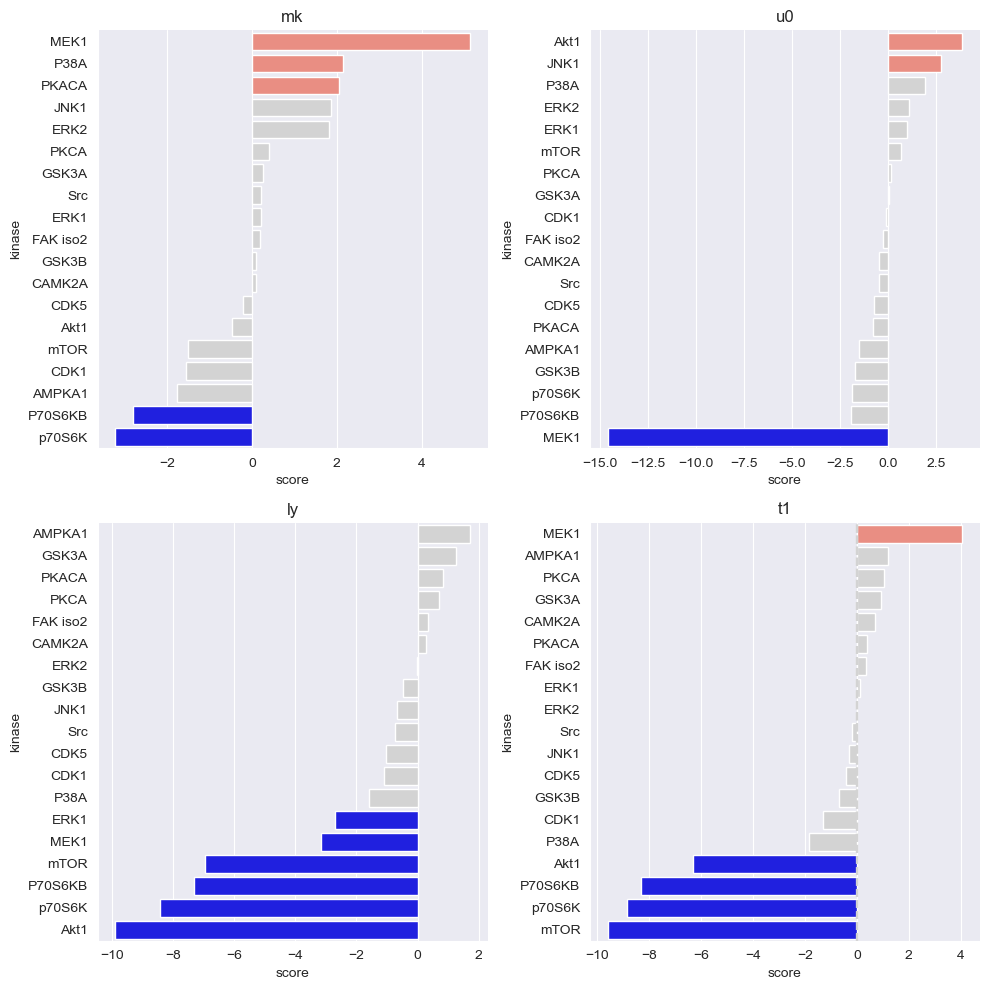

In [14]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

for ax, suffix in zip(axs.flatten(), ['_mk', '_u0', '_ly', '_t1']):
    ksea.ksea(col=f"logFC{suffix}", min_subs=5)
    ksea.plot_enrichment(up_col="salmon", ax=ax, ret_fig=False, title=suffix[1:])

plt.tight_layout()